<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10876 entries, 0 to 10875
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        10876 non-null  int64 
 1   keyword   10789 non-null  object
 2   location  7238 non-null   object
 3   text      10876 non-null  object
 4   target    10876 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 425.0+ KB
None
(10876, 5)
id             0
keyword       87
location    3638
text           0
target         0
dtype: int64


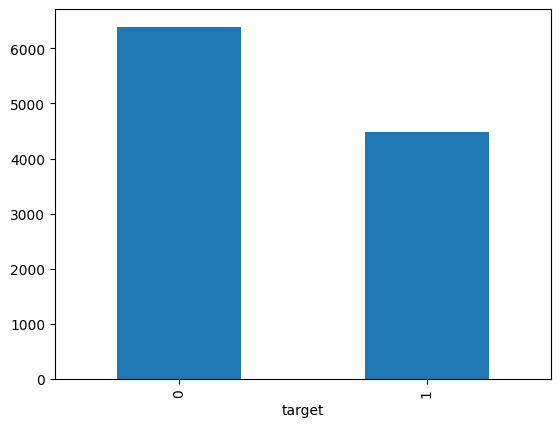

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import re ##regular expression library .
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.cluster import KMeans


df = pd.read_csv("/Users/tinganwang/Desktop/Pinciple of Data Science/Final Project/Book1.csv")


# check categorical feature
print(df.info())


# check missing values
print(df.shape)
print(df.isnull().sum())


# check balance
num = df['target']
num.value_counts().plot(kind='bar')
plt.show()

In [2]:
df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [3]:
'''Tokenization, Stop words removal, URL removal,  Stemming and Lemmatization'''

for dataFrame in [df]:
    for e in ['keyword', 'location','text']:
        dataFrame[e] = dataFrame[e].fillna('No_data')
df

,id,keyword,location,text,target
0,1,No_data,No_data,Our Deeds are the Reason of this #earthquake M...,1
1,4,No_data,No_data,Forest fire near La Ronge Sask. Canada,1
2,5,No_data,No_data,All residents asked to 'shelter in place' are ...,1
3,6,No_data,No_data,"13,000 people receive #wildfires evacuation or...",1
4,7,No_data,No_data,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...,...,...,...
10871,10861,No_data,No_data,EARTHQUAKE SAFETY LOS ANGELES ÛÒ SAFETY FASTE...,1
10872,10865,No_data,No_data,Storm in RI worse than last hurricane. My city...,1
10873,10868,No_data,No_data,Green Line derailment in Chicago http://t.co/U...,1
10874,10874,No_data,No_data,MEG issues Hazardous Weather Outlook (HWO) htt...,1


In [4]:
# Removing stop word

nltk.download('omw-1.4')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')
stoplist = set(stopwords.words('english'))

df['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stoplist)]))


# Only for shwoing the result
e1 = df['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stoplist)]))
print(e1[11])




df.head()

Haha South Tampa getting flooded hah- WAIT A SECOND I LIVE IN SOUTH TAMPA WHAT AM I GONNA DO WHAT AM I GONNA DO FVCK #flooding


[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/tinganwang/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/tinganwang/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/tinganwang/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/tinganwang/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,id,keyword,location,text,target
0,1,No_data,No_data,Our Deeds are the Reason of this #earthquake M...,1
1,4,No_data,No_data,Forest fire near La Ronge Sask. Canada,1
2,5,No_data,No_data,All residents asked to 'shelter in place' are ...,1
3,6,No_data,No_data,"13,000 people receive #wildfires evacuation or...",1
4,7,No_data,No_data,Just got sent this photo from Ruby #Alaska as ...,1


In [5]:
# remove URLS and special character, lemmatization, stemming

def remove_URLS(text):
    text = re.sub(r'https?:\/\/.*[\r\n]*', '', text)
    text = re.sub(r'http?:\/\/.*[\r\n]*', '', text)    #remove URL
    
    text=text.replace(r'&amp;?',r'and')
    text=text.replace(r'&lt;',r'<')
    text=text.replace(r'&gt;',r'>')                    #remove special character 
    
    text = re.sub(r"(?:\@)\w+", '', text)
    text=text.encode("ascii",errors="ignore").decode()
    text=re.sub(r'[:"#$%&\*+,-/:;<=>@\\^_`{|}~]+','',text)
    
    text=re.sub(r'[!]+','!',text)
    text=re.sub(r'[?]+','?',text)
    text=re.sub(r'[.]+','.',text)
   
    text=re.sub(r"'","",text)
    text=re.sub(r"\(","",text)
    text=re.sub(r"\)","",text)
    
    text = text.lower()
    
    text=" ".join(text.split())
    return text

def stemmer(text):
    stem_text = [PorterStemmer().stem(i) for i in text]
    return stem_text

# def stemmer(text):
#     for i in text:
#         stem_text = porterStemmer().stem(i)
#     return stem_text

def lemmatizer(text):
    lem_text = [WordNetLemmatizer().lemmatize(i) for i in text]
    return lem_text


df['text'] = df['text'].apply(lambda x: remove_URLS(x))
df['keyword'] = df['keyword'].apply(lambda x: remove_URLS(x))




# Only for showing the result
e2 = df['text'] = df['text'].apply(lambda x: remove_URLS(x))
print(e2[40])
'''Special character, hastags and URL are eliminated'''

check these out


'Special character, hastags and URL are eliminated'

In [6]:
# Tokenization

df['text_tokens'] = df['text'].apply(lambda x: word_tokenize(x))
df.head()

# create our tokens

,id,keyword,location,text,target,text_tokens
0,1,nodata,No_data,our deeds are the reason of this earthquake ma...,1,"[our, deeds, are, the, reason, of, this, earth..."
1,4,nodata,No_data,forest fire near la ronge sask canada,1,"[forest, fire, near, la, ronge, sask, canada]"
2,5,nodata,No_data,all residents asked to shelter in place are be...,1,"[all, residents, asked, to, shelter, in, place..."
3,6,nodata,No_data,13000 people receive wildfires evacuation orde...,1,"[13000, people, receive, wildfires, evacuation..."
4,7,nodata,No_data,just got sent this photo from ruby alaska as s...,1,"[just, got, sent, this, photo, from, ruby, ala..."


In [7]:
df['text_tokens'] = df['text'].apply(lambda x: stemmer(x))
df['text_tokens'] = df['text'].apply(lambda x: lemmatizer(x))


# Only for showing the result
e3 = df['text_tokens']
print(e3[31])

['w', 'h', 'o', 'l', 'e', 's', 'a', 'l', 'e', ' ', 'm', 'a', 'r', 'k', 'e', 't', 's', ' ', 'a', 'b', 'l', 'a', 'z', 'e']


In [8]:
# for better comparision

print(df['text'][5])
print(df['text_tokens'][5])

# Now we have dictionary of letters

rockyfire update california hwy 20 closed in both directions due to lake county fire cafire wildfires
['r', 'o', 'c', 'k', 'y', 'f', 'i', 'r', 'e', ' ', 'u', 'p', 'd', 'a', 't', 'e', ' ', 'c', 'a', 'l', 'i', 'f', 'o', 'r', 'n', 'i', 'a', ' ', 'h', 'w', 'y', ' ', '2', '0', ' ', 'c', 'l', 'o', 's', 'e', 'd', ' ', 'i', 'n', ' ', 'b', 'o', 't', 'h', ' ', 'd', 'i', 'r', 'e', 'c', 't', 'i', 'o', 'n', 's', ' ', 'd', 'u', 'e', ' ', 't', 'o', ' ', 'l', 'a', 'k', 'e', ' ', 'c', 'o', 'u', 'n', 't', 'y', ' ', 'f', 'i', 'r', 'e', ' ', 'c', 'a', 'f', 'i', 'r', 'e', ' ', 'w', 'i', 'l', 'd', 'f', 'i', 'r', 'e', 's']


In [9]:
df.head()

,id,keyword,location,text,target,text_tokens
0,1,nodata,No_data,our deeds are the reason of this earthquake ma...,1,"[o, u, r, , d, e, e, d, s, , a, r, e, , t, ..."
1,4,nodata,No_data,forest fire near la ronge sask canada,1,"[f, o, r, e, s, t, , f, i, r, e, , n, e, a, ..."
2,5,nodata,No_data,all residents asked to shelter in place are be...,1,"[a, l, l, , r, e, s, i, d, e, n, t, s, , a, ..."
3,6,nodata,No_data,13000 people receive wildfires evacuation orde...,1,"[1, 3, 0, 0, 0, , p, e, o, p, l, e, , r, e, ..."
4,7,nodata,No_data,just got sent this photo from ruby alaska as s...,1,"[j, u, s, t, , g, o, t, , s, e, n, t, , t, ..."


In [10]:
# split the dataset into X & y

X =df.drop(['target','id','location'], axis=1)
y =df['target']

X_train_val, X_test, y_train_val, y_test = train_test_split(X,y,
                                                           test_size=0.2101,
                                                           random_state=124)

print(X_train_val.shape)
print(X_test.shape)
X_train_val

(8590, 3)
(2286, 3)


,keyword,text,text_tokens
4830,mass20murder,this attempted mass murder brought to you by t...,"[t, h, i, s, , a, t, t, e, m, p, t, e, d, , ..."
494,attacked,telnet attacked from 1241317240 streamyxhomeso...,"[t, e, l, n, e, t, , a, t, t, a, c, k, e, d, ..."
2611,destroyed,black eye 9 a space battle occurred at star o7...,"[b, l, a, c, k, , e, y, e, , 9, , a, , s, ..."
4913,mayhem,beach reads in august giveaway hop amp is givi...,"[b, e, a, c, h, , r, e, a, d, s, , i, n, , ..."
1814,crashed,my son didnt sleep all night! ? so finally at ...,"[m, y, , s, o, n, , d, i, d, n, t, , s, l, ..."
...,...,...,...
681,blazing,come and join us tomorrow! august 7 2015 at tr...,"[c, o, m, e, , a, n, d, , j, o, i, n, , u, ..."
9154,fatal,seatbelts really do save people man alot of fa...,"[s, e, a, t, b, e, l, t, s, , r, e, a, l, l, ..."
8327,collapse,west side water main break causes street colla...,"[w, e, s, t, , s, i, d, e, , w, a, t, e, r, ..."
4764,lightning,shuts the door on the boom in the bottom half ...,"[s, h, u, t, s, , t, h, e, , d, o, o, r, , ..."


In [11]:
# Represent documents with TF-IDF represention

#TF-IDF representation for each document
vectorizer = TfidfVectorizer(stop_words='english')
data_train_vectors = vectorizer.fit_transform(X_train_val['text'])
data_test_vectors = vectorizer.transform(X_test['text']) 

print(data_train_vectors.shape, data_test_vectors.shape)
print(data_train_vectors)

"""we don't normalize the vectors again because TF-IDF is already a kind of a way of normalization"""

(8590, 15857) (2286, 15857)
  (0, 848)	0.46990667905323236
  (0, 9896)	0.34296827209508934
  (0, 2408)	0.4052161557757131
  (0, 9392)	0.35425515706464933
  (0, 8792)	0.3171127407865453
  (0, 1504)	0.5208676777642961
  (1, 13471)	0.5389685790519705
  (1, 107)	0.5389685790519705
  (1, 1497)	0.35852281989309925
  (1, 13961)	0.5389685790519705
  (2, 4170)	0.22449067656843288
  (2, 79)	0.26068525897989075
  (2, 12660)	0.28127150472057155
  (2, 410)	0.33508665322661846
  (2, 14335)	0.2902634111933613
  (2, 5612)	0.2902634111933613
  (2, 7446)	0.2681144931903059
  (2, 9893)	0.2902634111933613
  (2, 13327)	0.2629944154812936
  (2, 9931)	0.2681144931903059
  (2, 1790)	0.23478379943877328
  (2, 13147)	0.2527012926109532
  (2, 5244)	0.24929114131734212
  (2, 2071)	0.20839287251735072
  (3, 12510)	0.2998132211401659
  :	:
  (8587, 2327)	0.31254463009489714
  (8587, 8647)	0.3509269112853693
  (8587, 4806)	0.3313752854024052
  (8587, 13473)	0.29416535870743843
  (8587, 15340)	0.28655681513741216
  (

"we don't normalize the vectors again because TF-IDF is already a kind of a way of normalization"

In [12]:
# Use KNN to create the model

Xtr = data_train_vectors
Ytr = y_train_val

Xte = data_test_vectors
Yte = y_test

k_range = range(1, 6)
param_grid = dict(n_neighbors=k_range)

clf_knn =  KNeighborsClassifier(n_neighbors=1)

grid = GridSearchCV(clf_knn, param_grid, cv=5, scoring='accuracy')
grid.fit(Xtr, Ytr)

print(grid.best_score_)
print(grid.best_params_)

0.6807916181606519
{'n_neighbors': 1}


In [13]:
clf_knn = KNeighborsClassifier(n_neighbors=grid.best_params_['n_neighbors'])
clf_knn.fit(Xtr, Ytr)


# evaluate the model on the testing set
y_pred = clf_knn.predict(Xte)


# accuracy, f1, recall, precision score
acc = accuracy_score(Yte, y_pred)
f1 = f1_score(Yte, y_pred)
recall = recall_score(Yte, y_pred)
recallForZero = recall_score(Yte, y_pred, pos_label=0)
precision = precision_score(Yte, y_pred)


print(f'accuracy = {acc}\nF1 = {f1}\nrecall_score = {recall}\nrecall_Zero = {recallForZero}\nprecision_score = {precision}')

accuracy = 0.7283464566929134
F1 = 0.5423728813559322
recall_score = 0.3978378378378378
recall_Zero = 0.9529757531227039
precision_score = 0.8518518518518519


In [14]:
# Use Logistic Regression to create model

Xtrain = data_train_vectors
Ytrain = y_train_val

Xtest = data_test_vectors
Ytest = y_test

#=====training with cross validation======#
coeff = range(1, 7)
param_grid = dict(C=coeff)

clf_lr = LogisticRegression(penalty='l2')

grid = GridSearchCV(clf_lr, param_grid, cv=5, scoring='accuracy')
grid.fit(Xtrain, Ytrain)

print(grid.best_params_)

#=====testing======#
clf_lr = LogisticRegression(penalty='l2', C=grid.best_params_['C'])
clf_lr.fit(Xtrain, Ytrain)

y_pred = clf_lr.predict(Xtest)


# accuracy, micro/macro f1, recall, precision score
acc = accuracy_score(Ytest, y_pred)
macro_f1 = f1_score(Ytest, y_pred, average='macro')
micro_f1 = f1_score(Ytest, y_pred, average='micro')
# recall = np.sum(np.logical_and(y_pred==1, Yte==1) == True) / np.sum(Yte == True)
recall = recall_score(Ytest, y_pred)
# recall_for_0 = np.sum(np.logical_and(y_pred==0, Yte==0) == True) / np.sum(Yte == False)
recallForZero = recall_score(Ytest, y_pred, pos_label=0)
precision = precision_score(Ytest, y_pred)

print(f'accuracy = {acc}\nmacro_f1 = {macro_f1}\nmicro_f1 = {micro_f1}\nrecall_score = {recall}\nrecall_for_Zeros = {recallForZero}\nprecision_score = {precision}')
# we better use recall or prisicion because the data is unblanced

{'C': 5}
accuracy = 0.8438320209973753
macro_f1 = 0.8354137646674693
micro_f1 = 0.8438320209973753
recall_score = 0.7632432432432432
recall_for_Zeros = 0.8986039676708303
precision_score = 0.8364928909952607


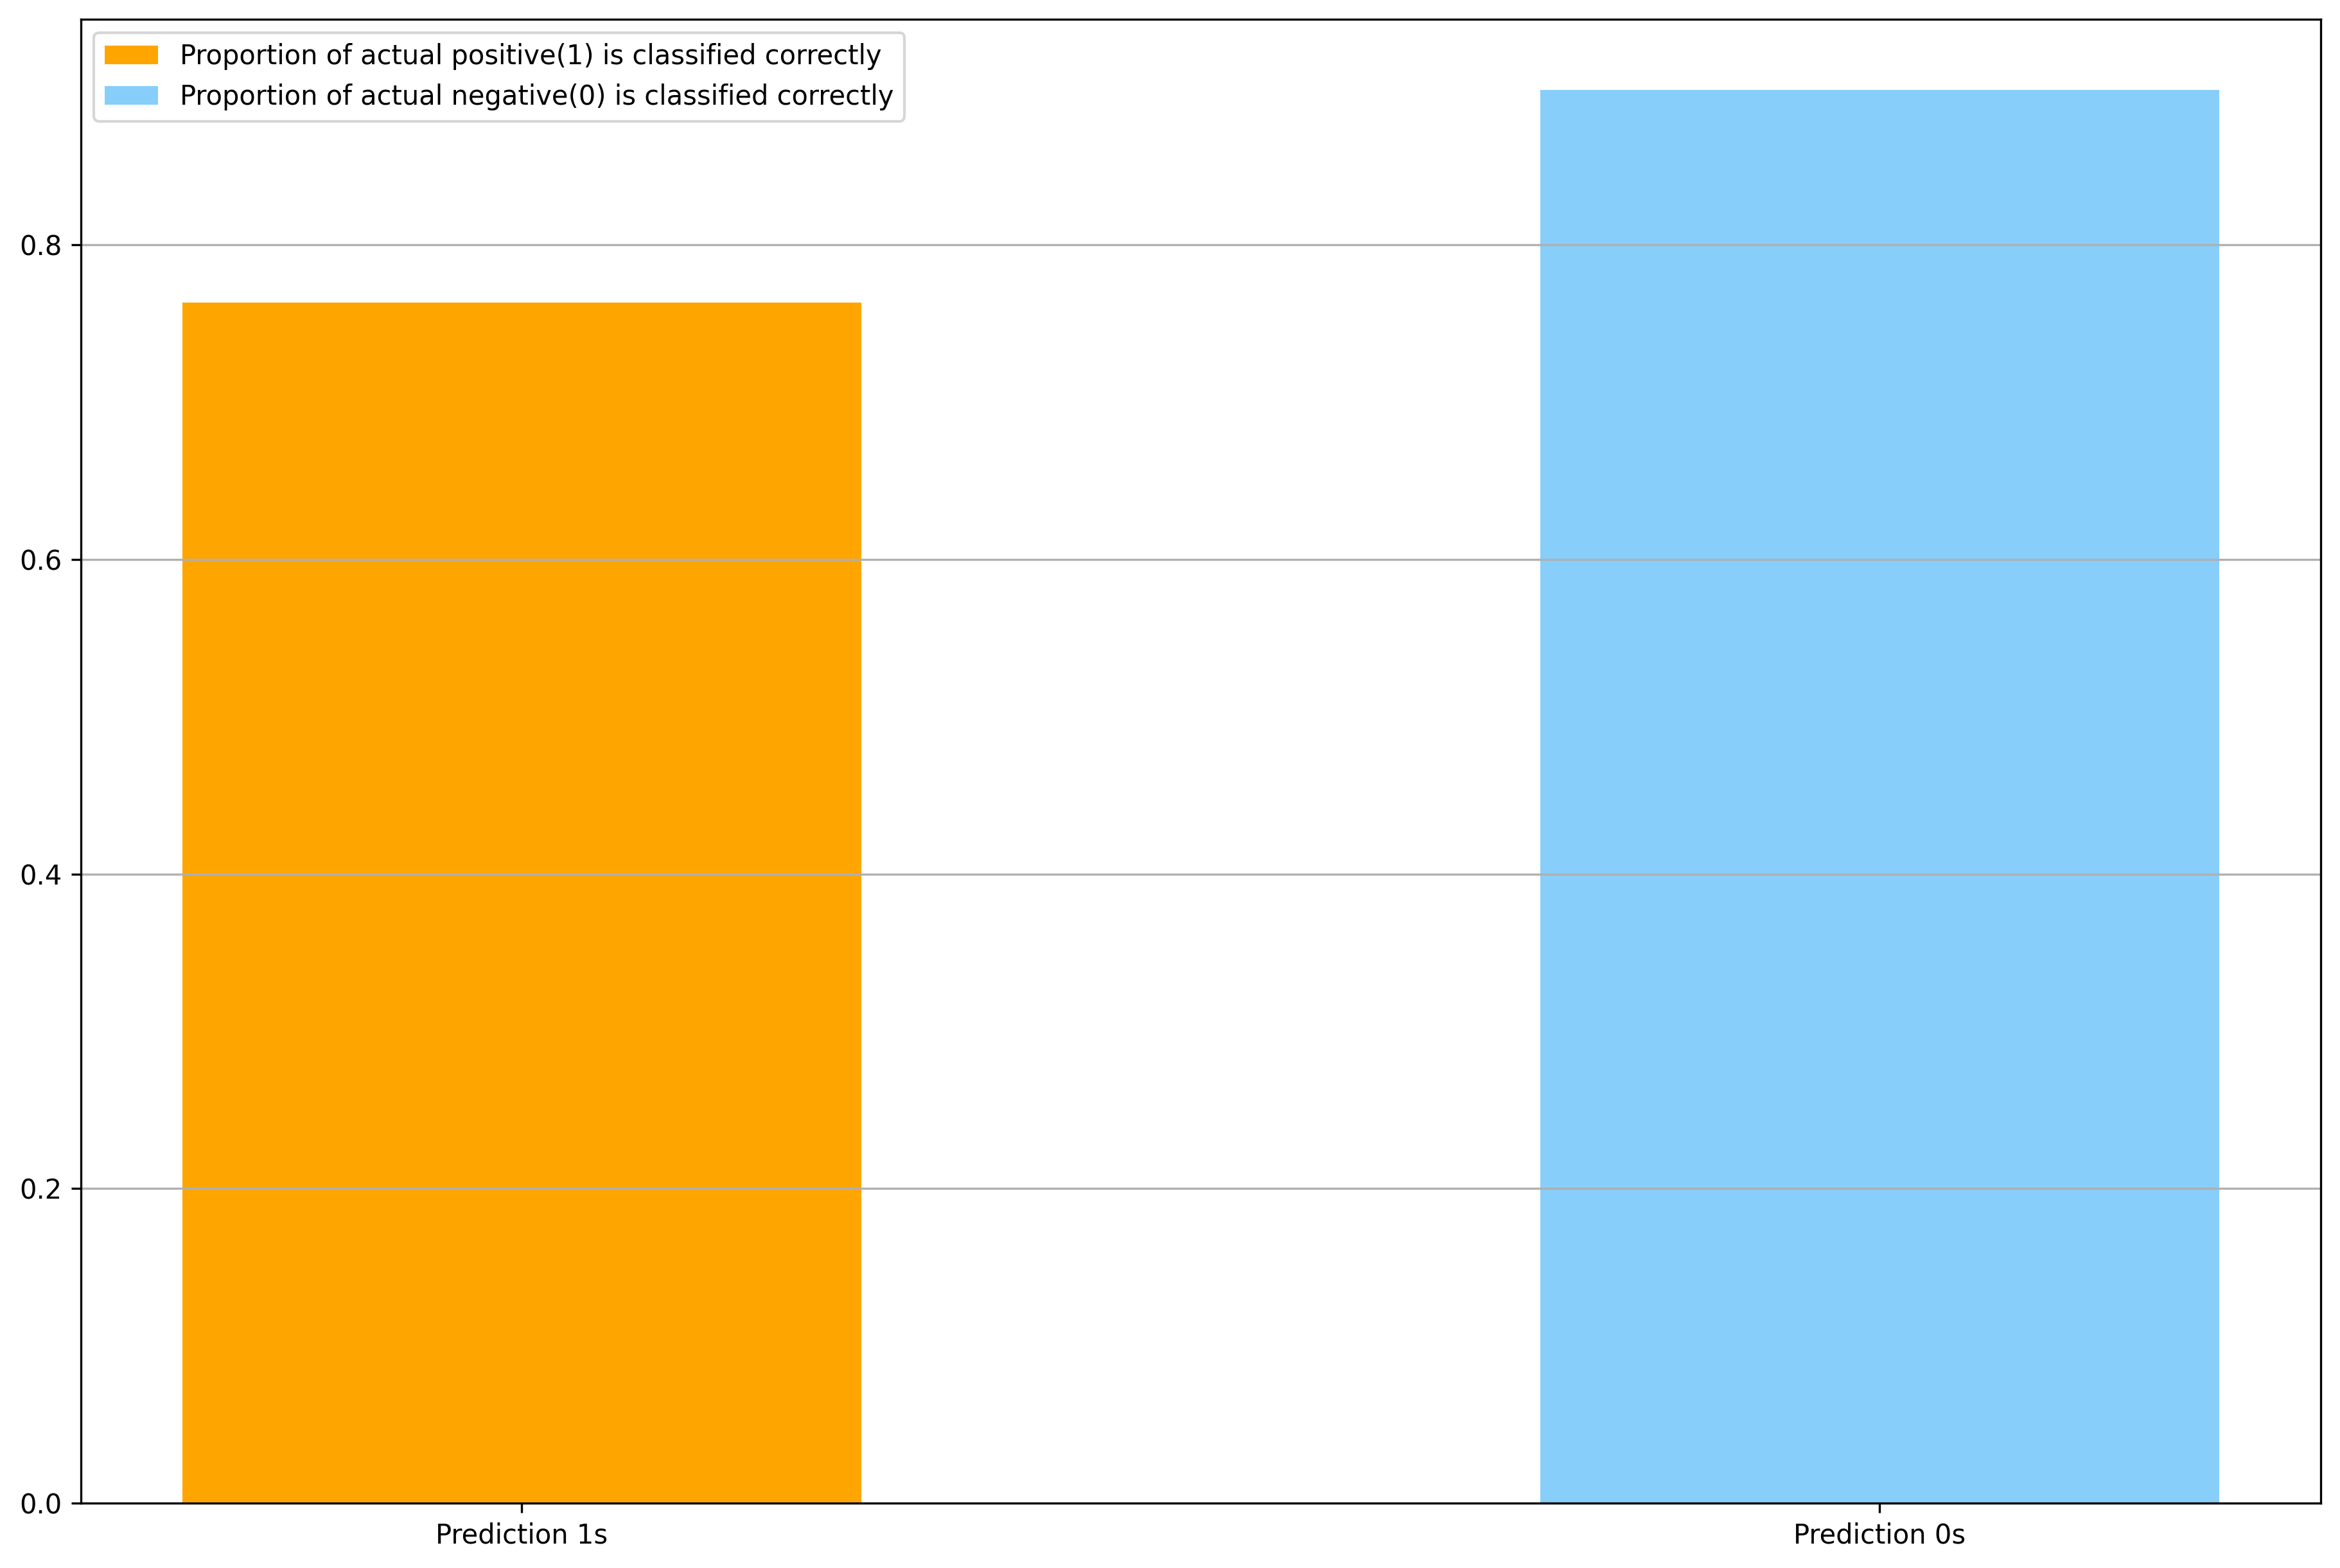

In [15]:
# Compare the recall score for predicting 1s and 0s

x = np.arange(1,3)
ysize = [recall, recallForZero]
label = ['Prediction 1s', 'Prediction 0s']
plt.figure( figsize=(15,10), dpi=300 )

plt.subplot()
plt.xticks(x,label)
col = ['orange', 'lightskyblue']
legends = ['Proportion of actual positive(1) is classified correctly','Proportion of actual negative(0) is classified correctly']
plt.bar(x, ysize, label=legends, color=col, width = 0.5)
plt.legend()
plt.grid(axis='y')
plt.show()

[[-0.25224385  0.11500984  0.64699378 ... -0.68428005  0.59502083
  -0.1972739 ]]
[[-0.25224385  0.11500984  0.64699378 -0.30711388 -0.56013076  0.13026355
   0.13026355  0.88044522  1.07655418  0.90453443  0.35894411  0.28021027
  -0.8158896  -0.27330195  0.4248359  -0.21525863  0.33852602 -0.30711388
   0.83905526  0.27507199  0.5043028   0.26258376  0.16326697  0.25965087
   0.38748307 -0.36797605  0.28021027 -1.00294667 -0.38590621 -0.19001921]]


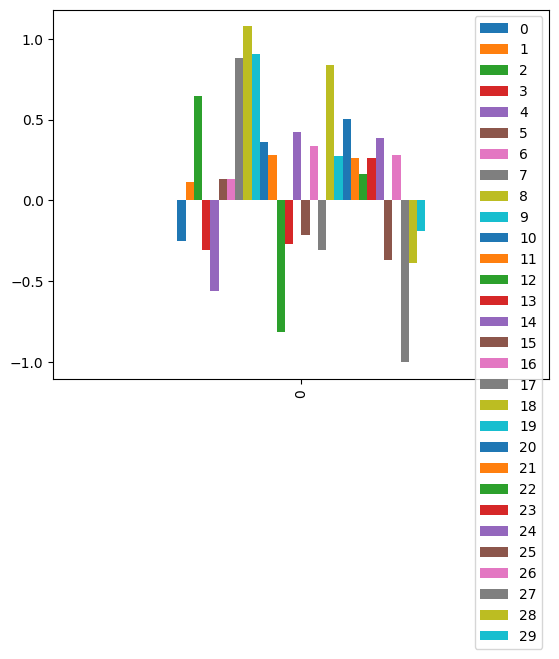

In [16]:
clf_w = clf_lr.coef_
print(clf_w)
print(clf_w[:,0:30])

# Convert np array into DataFrame
w = pd.DataFrame(clf_w[:,0:30])
w.plot(kind='bar')
plt.show()

# Use bar plot to visulaize the elements of the learned model parameter vector 𝐰. Some elements have larger absolute values, while others do not. 
# The perameters with a larger values indicate that it has a bigger influence in that feature
# So, the 5th, 6th, 7th, 12th, these perameters has a bigger influence 

In [17]:
# Use K-means to do clustering and find the 10 most representative words in each cluster

twoCluster = KMeans(n_clusters=5, random_state=0).fit(Xtr)
cnetroids = twoCluster.cluster_centers_    #get the clustering centroids


# print(cnetroids)
print(cnetroids.shape)
from sklearn.metrics.cluster import normalized_mutual_info_score
nmi = normalized_mutual_info_score(twoCluster.labels_, Ytr, average_method='arithmetic')
print(f'The normalized mutual information score of the K-means method is {nmi:.4f}')



# find the 10th closest means to the centroids
cnetroids_ordered = cnetroids.argsort()[:, ::-1]
term = vectorizer.get_feature_names_out()

lst1 = []
for i in range(3):
    print("Cluster:", i+1)
    for j in cnetroids_ordered[i, :10]:
        print(term[j])
        lst1.append(term[j])
print(lst1)

(5, 15857)
The normalized mutual information score of the K-means method is 0.0388
Cluster: 1
im
just
video
amp
new
dont
people
disaster
news
liked
Cluster: 2
swallowed
minute
airport
sandstorm
watch
fahlowcw
fadc
faded
fading
fag
Cluster: 3
suicide
bomber
detonated
16yr
pkk
saudi
mosque
old
bomb
trench
['im', 'just', 'video', 'amp', 'new', 'dont', 'people', 'disaster', 'news', 'liked', 'swallowed', 'minute', 'airport', 'sandstorm', 'watch', 'fahlowcw', 'fadc', 'faded', 'fading', 'fag', 'suicide', 'bomber', 'detonated', '16yr', 'pkk', 'saudi', 'mosque', 'old', 'bomb', 'trench']


/Users/tinganwang/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
